In [1]:
import sys
import os
import time
import pickle
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
sys.path.append('scripts')
import cons
from utilities.timeit import timeit
from utilities.time_data import time_data
from SeaBornPlots.time_plot import time_plot
from SeaBornPlots.map_plot import map_plot

In [3]:
# load master data
data = pd.read_feather(cons.master_data_fpath)

In [4]:
# load preaggregated data
with open(cons.preaggregate_data_fpath, "rb") as f:
    pre_agg_data_dict = pickle.load(f)

In [5]:
date_strftime_dict = cons.date_strftime_dict
counties = cons.counties
agg_dict = {col:'mean' for col in cons.col_options}

# Visualisation Proto-Types

## GIS Heat Map

In [6]:
# load preaggregated data
with open(cons.map_data_fpath, "rb") as f:
    map_data_dict = pickle.load(f)

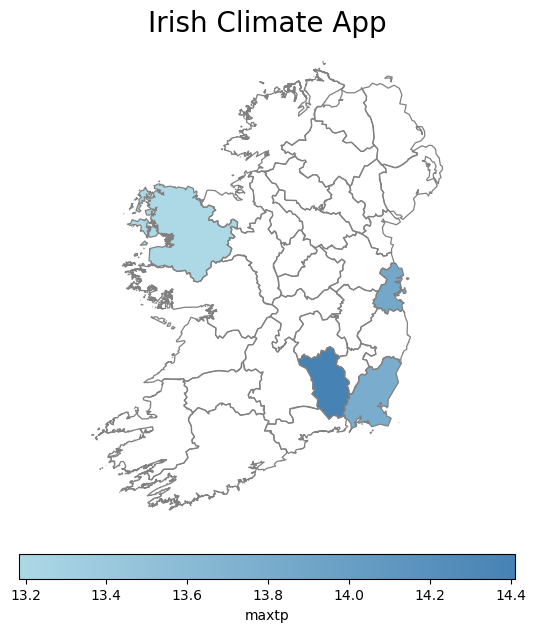

0

In [7]:
map_plot(map_data_dict, stat = 'mean', col = 'maxtp')

## Time Series Plots

### Yearly Max Termperature by County

In [8]:
# set year strftime pattern and time span
year_strftime = date_strftime_dict['year']
time_span = ['2010', '2019']
# generate the time series data
params_dict = {'data':pre_agg_data_dict['mean'], 'agg_dict':agg_dict, 'time_span':time_span, 'counties':counties, 'strftime':year_strftime}
year_data = timeit(func = time_data, params = params_dict, itr = 20)

Mean Execution Time: 0.023 seconds


In [9]:
year_data.head()

,county,date,date_str,maxtp,mintp,gmin,soil,wdsp,sun,evap,rain,index
0,dublin,2010-01-01,2010,12.668476,5.475118,2.764371,9.930142,8.694708,4.457692,2.023845,1.982690,0
1,dublin,2011-01-01,2011,14.099451,7.175627,4.086044,10.793961,10.781700,4.152136,2.145929,1.866980,1
2,dublin,2012-01-01,2012,13.210652,6.706455,4.075311,10.355746,10.094679,3.812458,1.871384,2.397094,2
3,dublin,2013-01-01,2013,13.439331,6.733920,3.973571,10.288044,10.348187,3.883664,2.124072,2.002649,3
4,dublin,2014-01-01,2014,14.071012,7.154604,4.287969,10.952628,10.307428,4.029173,2.108372,2.607735,4


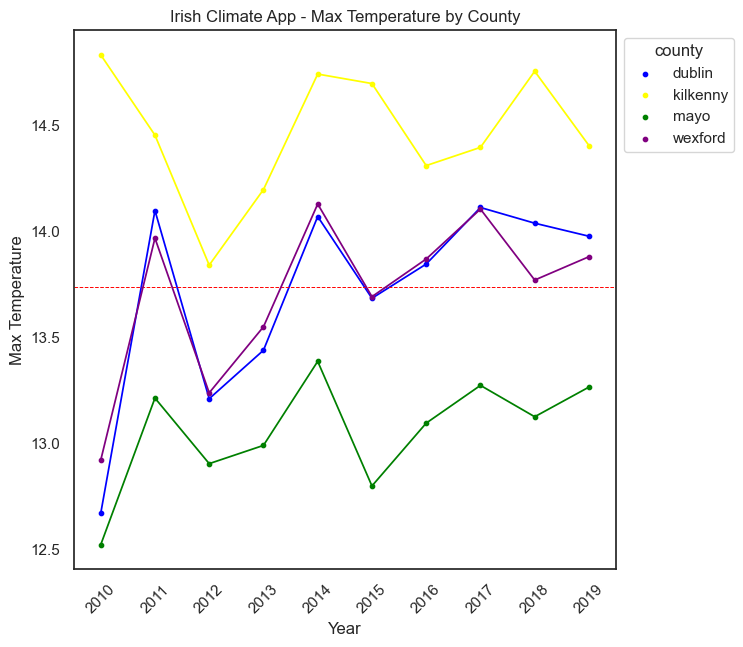

0

In [10]:
time_plot(data = year_data, 
          x = 'index', 
          y = 'maxtp', 
          hue = 'county', 
          strftime = year_strftime, 
          refline = year_data['maxtp'].mean(), 
          title = 'Irish Climate App - Max Temperature by County',
          xlabel = 'Year',
          ylabel = 'Max Temperature'
         )

### Monthly Min Temperature by County

In [11]:
# set month strftime pattern and time span
month_strftime = date_strftime_dict['month']
time_span = ['01', '12']
# generate the time series data
params_dict = {'data':pre_agg_data_dict['mean'], 'agg_dict':agg_dict, 'time_span':time_span, 'counties':counties, 'strftime':month_strftime}
month_data = timeit(func = time_data, params = params_dict, itr = 20)

Mean Execution Time: 0.024 seconds


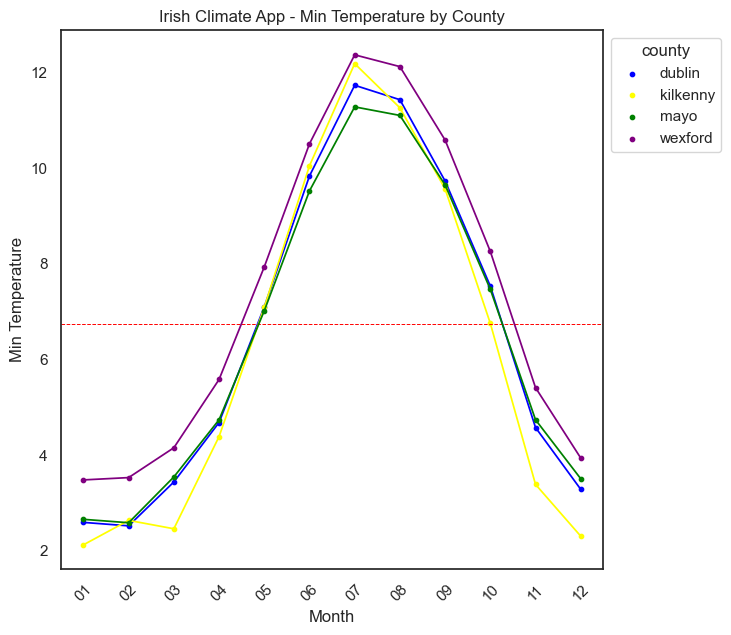

0

In [12]:
time_plot(data = month_data, 
          x = 'index',
          y = 'mintp', 
          hue = 'county', 
          strftime = year_strftime, 
          refline = year_data['mintp'].mean(), 
          title = 'Irish Climate App - Min Temperature by County',
          xlabel = 'Month',
          ylabel = 'Min Temperature'
         )

# Bokeh Server Applications

In [12]:
# Create and deploy interactive data applications
from IPython.display import IFrame
IFrame('http://localhost:5006/bokeh_map_app', width=1200, height=700)

In [13]:
# Create and deploy interactive data applications
from IPython.display import IFrame
IFrame('http://localhost:5006/bokeh_line_app', width=1200, height=700)